*CoLab : 온라인 에디터의 일종으로 GPU, CPU, RAM을 제공. 패키지 설치, 환경 설정 등에서 편리함.

## 인공신경망은 어떻게 학습되는가?

### Gradient Descent

In [1]:
from google.colab import drive
drive.mount('/content/drive')
# 현재 실습하고 있는 colab과 나의 google drive계정을 연결시켜주는 코드

Mounted at /content/drive


In [2]:
import numpy as np 
# linear algebra
import pandas as pd 
# data processing,
import os 
# 운영체제와의 상호작용을 돕는 모듈 ex) os.getcwd() : 현재 경로 호출 등.
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# 경고무시
from IPython.display import Image
# 이미지 로드해주는 라이브러리

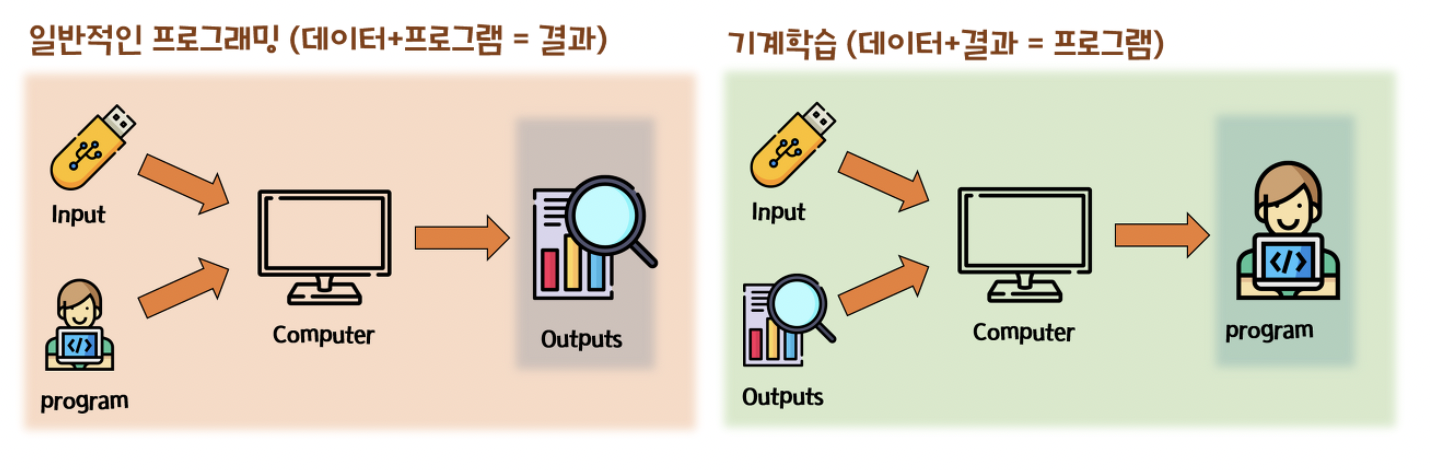

In [3]:
Image('/content/drive/MyDrive/CDS2(2022-2)/img/01/csml.png')

### 보스턴 주택 가격 데이터 세트를 인공신경망 모델에서 학습 및 테스트하기 위한 데이터 로드
* 사이킷런에서 보스턴 주택 가격 데이터 세트를 로드하고 이를 DataFrame으로 생성

In [4]:
from sklearn.datasets import load_boston
# sklearn에 내장되어있는 데이터

boston = load_boston() 
# boston이라는 이름으로 데이터 셋 할당

In [5]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

→ data와 target 그리고 feature_names이 있다.

In [6]:
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)
# data를 dataframe 형태로 정의 
# data를 입력하고, column명도 사전에 지정되어있는 feature name으로 정의

bostonDF['PRICE'] = boston.target
# 예측해야하는 종속변수를 'PRICE'로 정의

print(bostonDF.shape)
# 전체 506개의 데이터 셋, 총 독립변수 수 13개, 종속변수 1개

(506, 14)


In [7]:
bostonDF.head()
# 가장 위의 5개 출력
# 각각 해당하는 feature와 종속변수인 PRICE를 확인할 수 있음.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


→ 종속변수(PRICE)에 해당하는 다양한 feature 정보가 있는 Dataset : 이제 우리는 몇가지 feature를 사용하여 target 즉, 집 가격을 예측해볼 것이다.

### 1) RM(방의 갯수), LSTAT(하위계층 비율) 두개의 독립변수만을 사용하여 선형식을 정의하여 PRRICE(집값)을 예측할 것이다.

원래 인공신경망은 선형식 이후 비선형함수를 통과하지만, 여기서는 GD의 개념을 이해하기 위해서 생략한다.

<br> y* = W1 x RM + W2 x LSTAT + bias
* w1은 RM(방의 계수) 피처의 Weight 값 : 방의 갯수가 많으면 집값이 비쌀 것이다.(예상)
* w2는 LSTAT(하위계층 비율) 피처의 Weight 값 : 하위계층 비율이 높으면 집값이 쌀 것이다.(예상)
* bias는 Bias
* N은 입력 데이터 건수

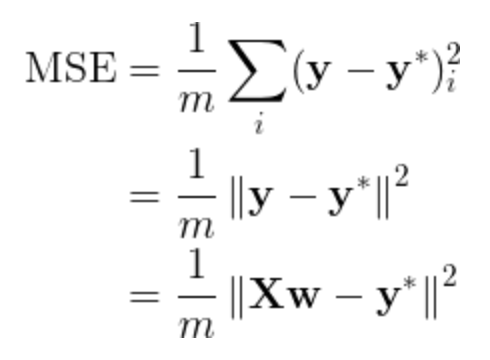

In [9]:
Image('/content/drive/MyDrive/CDS2(2022-2)/img/01/mse.png')
# y*은 예측 값, y는 실제 값
# 예측값과 실제값의 차이를 제곱한 평균 값을(MSE) Loss function으로 둔다.
# Loss function을 최소화(예측 값 - 실제 값)하는 방향으로 학습이 되도록 한다.

* MSE를 독립변수 세타에 대해 편미분 : 위의 식에서 우리가 학습을 통해 찾아야하는 값은 예측 값을 만드는 세타이다.

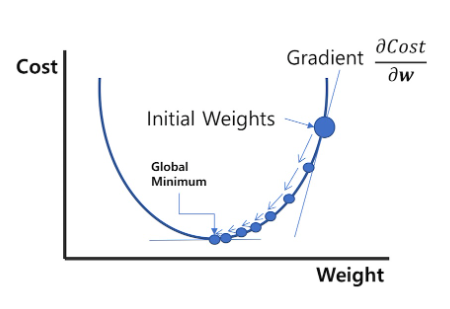

In [10]:
Image('/content/drive/MyDrive/CDS2(2022-2)/img/01/msedt.png')
# 세타(아래에는 w)를 편미분하여 최소로 가는 방향을 찾아본다.

* 각 파라미터(w1:가중치 파라미터, w0:편향)로 편미분 : 최소지점을 찾기 위해서

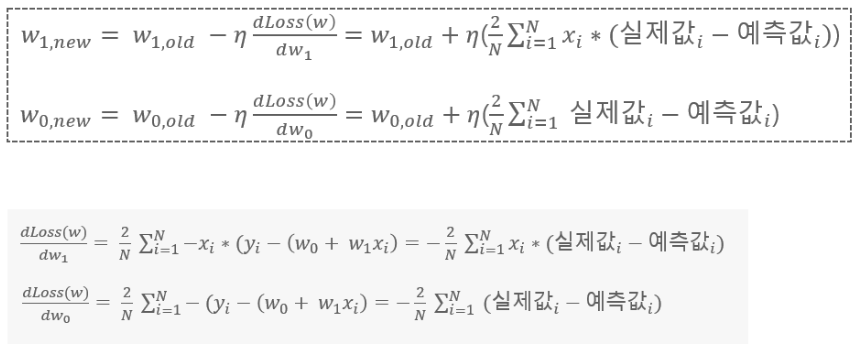

In [11]:
Image('/content/drive/MyDrive/CDS2(2022-2)/img/01/gd.png')
# 아래의 수식에서 보면, 가중치 파라미터는 실제값과 예측값의 차이에 x(i)를 곱해준 값으로 계산된다.
# 편향 파라미터는 실제값에과 예측값의 차이를 아래와 같이 계산한 값으로 나온다.

### Weight와 Bias의 Update 값을 계산하는 함수 생성.

<br> y* = W1 x RM + W2 x LSTAT + bias
* w1은 RM(방의 계수) 피처의 Weight 값 : 방의 갯수가 많으면 집값이 비쌀 것이다.(예상)
* w2는 LSTAT(하위계층 비율) 피처의 Weight 값 : 하위계층 비율이 높으면 집값이 쌀 것이다.(예상)
* bias는 Bias
* N은 입력 데이터 건수

In [12]:
# gradient_descent()함수에서 반복적으로 호출되면서 update될 weight/bias 값을 계산하는 함수. 
# rm은 RM(방 개수), lstat(하위계층 비율), target은 PRICE임. 전체 array가 한번에 계산.
# 반환 값은 weight와 bias가 update되어야 할 값과 Mean Squared Error 값을 loss로 반환.
def get_update_weights_value(bias, w1, w2, rm, lstat, target, learning_rate=0.01):
    # bias, w1, w2 파라미터와 각 변수들과 학습률을 입력 받는다.

    N = len(target)
    # 데이터 건수
 
    predicted = w1 * rm + w2*lstat + bias
    # 예측 값. 선형식

    diff = target - predicted
    # 실제값과 예측값의 차이

    bias_factors = np.ones((N,))
    # bias 업데이트를 위해 1로 채운 값.
      
    w1_update = -(2/N)*learning_rate*(np.dot(rm.T, diff))
    # w1 업데이트 값 : 위에서 구한데로 실제값과 예측값의 차이에 x(i)를 곱한 후 학습률을 곱함.
    w2_update = -(2/N)*learning_rate*(np.dot(lstat.T, diff))
    # w2 업데이트 값 : 위와 동일
    bias_update = -(2/N)*learning_rate*(np.dot(bias_factors.T, diff))
    # bisa 업데이트 : 1을 곱한다.

    # Mean Squared Error값을 계산.
    mse_loss = np.mean(np.square(diff))
    
    # weight와 bias가 update되어야 할 값과 Mean Squared Error 값을 반환. 
    return bias_update, w1_update, w2_update, mse_loss

### Gradient Descent 를 적용하는 함수 생성
* iter_epochs 수만큼 반복적으로 get_update_weights_value()를 호출하여 update될 weight/bias값을 구한 뒤 Weight/Bias를 Update적용. 

In [13]:
# RM, LSTAT feature array와 PRICE target array를 입력 받아서 iter_epochs수만큼 반복적으로 Weight와 Bias를 update적용. 
def gradient_descent(features, target, iter_epochs=1000, verbose=True):
    
    w1 = np.zeros((1,))
    w2 = np.zeros((1,))
    bias = np.zeros((1, ))
    print('최초 w1, w2, bias:', w1, w2, bias)
    # w1, w2는 numpy array 연산을 위해 1차원 array로 변환하되 초기 값은 0으로 설정
    # bias도 1차원 array로 변환하되 초기 값은 1로 설정. 

    
    learning_rate = 0.01
    rm = features[:, 0]
    lstat = features[:, 1]
    # learning_rate와 RM, LSTAT 피처 지정. 호출 시 numpy array형태로 RM과 LSTAT으로 된 2차원 feature가 입력됨.

  
    # iter_epochs 수만큼 반복하면서 weight와 bias update 수행. 
    for i in range(iter_epochs):
        
        bias_update, w1_update, w2_update, loss = get_update_weights_value(bias, w1, w2, rm, lstat, target, learning_rate)
        # weight/bias update 값 계산 : 앞에서 구현한 함수
         
        w1 = w1 - w1_update
        # w1 값 업데이트
        w2 = w2 - w2_update
        # w2 값 업데이트
        bias = bias - bias_update
        # weight/bias의 update 적용.
        
        if verbose:
            print('Epoch:', i+1,'/', iter_epochs)
            print('w1:', w1, 'w2:', w2, 'bias:', bias, 'loss:', loss)
            # 업데이트 과정 출력
        
    return w1, w2, bias

### Gradient Descent 적용
* 신경망은 데이터를 정규화/표준화 작업을 미리해 주어야 함. 
* 이를 위해 사이킷런의 MinMaxScaler를 이용하여 개별 feature값은 0~1사이 값으로 변환후 학습 적용.

In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(bostonDF[['RM', 'LSTAT']])

In [15]:
bostonDF[['RM', 'LSTAT']]
# 스케일링 전

,RM,LSTAT
0,6.575,4.98
1,6.421,9.14
2,7.185,4.03
3,6.998,2.94
4,7.147,5.33
...,...,...
501,6.593,9.67
502,6.120,9.08
503,6.976,5.64
504,6.794,6.48


In [16]:
scaled_features
# 스케일링 후

array([[0.57750527, 0.08967991],
       [0.5479977 , 0.2044702 ],
       [0.6943859 , 0.06346578],
       ...,
       [0.65433991, 0.10789183],
       [0.61946733, 0.13107064],
       [0.47307913, 0.16970199]])

In [17]:
w1, w2, bias = gradient_descent(scaled_features, bostonDF['PRICE'].values, iter_epochs=5000, verbose=True)
# 5000번 반복해서 gradient_descent 함수 적용
print('##### 최종 w1, w2, bias #######')
print(w1, w2, bias)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Epoch: 2502 / 5000
w1: [23.9249342] w2: [-21.23815095] bias: [16.45256258] loss: 30.979973242429722
Epoch: 2503 / 5000
w1: [23.92651912] w2: [-21.24062335] bias: [16.45248123] loss: 30.979108879218803
Epoch: 2504 / 5000
w1: [23.92810265] w2: [-21.24309331] bias: [16.45239987] loss: 30.97824615628058
Epoch: 2505 / 5000
w1: [23.92968481] w2: [-21.24556086] bias: [16.45231849] loss: 30.97738507049069
Epoch: 2506 / 5000
w1: [23.93126558] w2: [-21.24802598] bias: [16.45223711] loss: 30.976525618730737
Epoch: 2507 / 5000
w1: [23.93284497] w2: [-21.25048868] bias: [16.45215571] loss: 30.975667797888264
Epoch: 2508 / 5000
w1: [23.93442299] w2: [-21.25294896] bias: [16.4520743] loss: 30.974811604856743
Epoch: 2509 / 5000
w1: [23.93599963] w2: [-21.25540682] bias: [16.45199288] loss: 30.973957036535577
Epoch: 2510 / 5000
w1: [23.93757489] w2: [-21.25786227] bias: [16.45191145] loss: 30.973104089830052
Epoch: 2511 / 5000
w1: [23.93914878] w2: [-21.26031531] bia

→ Loss를 줄이는 방향으로 파라미터 업데이트

### 계산된 Weight와 Bias를 이용하여 Price 예측
* 예측 feature 역시 0~1사이의 scaled값을 이용하고 Weight와 bias를 적용하여 예측값 계산. 

In [18]:
predicted = scaled_features[:, 0]*w1 + scaled_features[:, 1]*w2 + bias
# 예측 식 정의
bostonDF['PREDICTED_PRICE'] = predicted
# 예측 값
bostonDF.head(10)
# 상위 10개 값 출력

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,PREDICTED_PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,28.935533
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,25.483093
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,32.545474
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,32.334142
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,31.516284
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7,28.074722
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9,21.342942
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1,17.772340
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5,8.129206
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9,18.276548


### Keras를 이용하여 보스턴 주택가격 모델 학습 및 예측
* Dense Layer를 이용하여 인공신경망 구현. units는 1로 설정. 

In [19]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Dense(1, input_shape=(2, ), activation=None, kernel_initializer='zeros', bias_initializer='ones')
])
# 1-layer model

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(optimizer=Adam(learning_rate=0.01), loss='mse', metrics=['mse'])
# Adam optimizer를 이용하고 Loss 함수는 Mean Squared Error, 성능 측정 역시 MSE를 이용하여 학습 수행. 
model.fit(scaled_features, bostonDF['PRICE'].values, epochs=1000)
# model 학습 (사용할 feature, 예측해야하는 변수(종속변수), 반복횟수)

Epoch 1/1000
16/16 [==============================] - 1s 2ms/step - loss: 542.3983 - mse: 542.3983
Epoch 2/1000
16/16 [==============================] - 0s 2ms/step - loss: 530.2048 - mse: 530.2048
Epoch 3/1000
16/16 [==============================] - 0s 2ms/step - loss: 518.2405 - mse: 518.2405
Epoch 4/1000
16/16 [==============================] - 0s 2ms/step - loss: 506.5600 - mse: 506.5600
Epoch 5/1000
16/16 [==============================] - 0s 2ms/step - loss: 495.1391 - mse: 495.1391
Epoch 6/1000
16/16 [==============================] - 0s 1ms/step - loss: 483.8578 - mse: 483.8578
Epoch 7/1000
16/16 [==============================] - 0s 1ms/step - loss: 472.9423 - mse: 472.9423
Epoch 8/1000
16/16 [==============================] - 0s 2ms/step - loss: 462.1721 - mse: 462.1721
Epoch 9/1000
16/16 [==============================] - 0s 2ms/step - loss: 451.6574 - mse: 451.6574
Epoch 10/1000
16/16 [==============================] - 0s 1ms/step - loss: 441.4046 - mse: 441.4046
Epoch 11/

### Keras로 학습된 모델을 이용하여 주택 가격 예측 수행. 

In [22]:
predicted = model.predict(scaled_features)
# feature에 해당하는 종속변수 예측
bostonDF['KERAS_PREDICTED_PRICE'] = predicted
# 예측 값 dataframe에 추가
bostonDF.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,PREDICTED_PRICE,KERAS_PREDICTED_PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,28.935533,28.967182
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,25.483093,25.490778
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,32.545474,32.623943
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,32.334142,32.402534
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,31.516284,31.587994
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7,28.074722,28.095226
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9,21.342942,21.311016
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1,17.772340,17.731112
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5,8.129206,8.015672
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9,18.276548,18.229582


### Stochastic Gradient Descent와 Mini Batch Gradient Descent 구현
* SGD 는 전체 데이터에서 확률적으로 임의의 데이터만 선택하여 Gradient Descent 로 Weight/Bias Update 계산한 뒤 Weight/Bias 적용
* Mini Batch GD는 전체 데이터에서 Batch 건수만큼 데이터를 선택하여 Gradient Descent로 Weight/Bias Update 계산한 뒤 Weight/Bias 적용

In [23]:
import numpy as np 
import pandas as pd
from sklearn.datasets import load_boston

boston = load_boston()
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)
bostonDF['PRICE'] = boston.target
print(bostonDF.shape)
bostonDF.head()
# 데이터 다시 업데이트

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### SGD 기반으로 Weight/Bias update 값 구하기

* 위와 동일한 Gradient 업데이트 함수

In [24]:
def get_update_weights_value_sgd(bias, w1, w2, rm_sgd, lstat_sgd, target_sgd, learning_rate=0.01):
    
    # 데이터 건수
    N = target_sgd.shape[0]
    # 예측 값. 
    predicted_sgd = w1 * rm_sgd + w2*lstat_sgd + bias
    # 실제값과 예측값의 차이 
    diff_sgd = target_sgd - predicted_sgd
    # bias 를 array 기반으로 구하기 위해서 설정. 
    bias_factors = np.ones((N,))
    
      
    w1_update = -(2/N)*learning_rate*(np.dot(rm_sgd.T, diff_sgd))
    w2_update = -(2/N)*learning_rate*(np.dot(lstat_sgd.T, diff_sgd))
    bias_update = -(2/N)*learning_rate*(np.dot(bias_factors.T, diff_sgd))
    # weight와 bias를 얼마나 update할 것인지를 계산.
    
    # Mean Squared Error값을 계산. 
    #mse_loss = np.mean(np.square(diff))
    
    # weight와 bias가 update되어야 할 값 반환 
    return bias_update, w1_update, w2_update

### SGD 수행하기

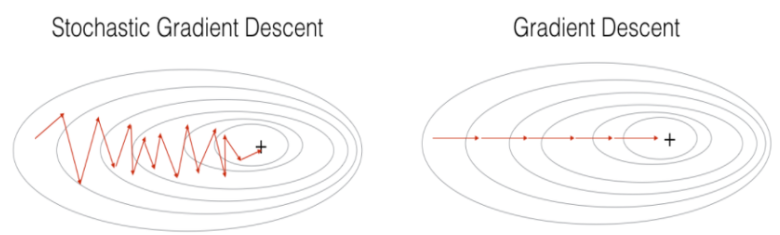

In [25]:
Image('/content/drive/MyDrive/CDS2(2022-2)/img/01/sgd.png')

* 오른쪽은 전체 데이터를 갖고 순차적으로 여러번 반복하여 최소점을 찾아간다. 왼쪽의 업데이트 과정은 확률적으로 데이터를 추출하여 최소점을 찾아가는 과정을 진행할 것이다.

* 랜덤한 값을 뽑는 방법

In [31]:
np.random.choice(10, 1) # 0~9까지 숫자중 1개를 램덤하게 뽑는다.

array([6])

In [32]:
print(bostonDF['PRICE'].values.shape)
# 전체 종속변수 갯수
print(np.random.choice(bostonDF['PRICE'].values.shape[0], 1))
# 랜덤하게 한개 뽑기
# print(np.random.choice(506, 1)) : 506개중 1개 뽑기

(506,)
[66]


* 위와 동일하게 Gradient를 업데이트 하되, 확률적으로 특정 point 지점에서 값을 뽑아서 업데이트를 진행한다.

In [33]:
# RM, LSTAT feature array와 PRICE target array를 입력 받아서 iter_epochs수만큼 반복적으로 Weight와 Bias를 update적용. 
def st_gradient_descent(features, target, iter_epochs=1000, verbose=True):
    
    np.random.seed = 2022
    # 랜덤 시드
    w1 = np.zeros((1,))
    w2 = np.zeros((1,))
    bias = np.zeros((1, ))
    print('최초 w1, w2, bias:', w1, w2, bias)
    # w1, w2는 numpy array 연산을 위해 1차원 array로 변환하되 초기 값은 0으로 설정
    # bias도 1차원 array로 변환하되 초기 값은 1로 설정. 
    
    learning_rate = 0.01
    rm = features[:, 0]
    lstat = features[:, 1]
    # learning_rate와 RM, LSTAT 피처 지정. 호출 시 numpy array형태로 RM과 LSTAT으로 된 2차원 feature가 입력됨.
    
    # iter_epochs 수만큼 반복하면서 weight와 bias update 수행. 
    for i in range(iter_epochs):
        
        #############
        #### SGD ####
        #############
        
        stochastic_index = np.random.choice(target.shape[0], 1)
        #iteration 시마다 stochastic gradient descent 를 수행할 데이터를 한개만 추출. 
        # target.shape의 숫자안에서 1개의 표본 뽑기 -> index로 저장

        rm_sgd = rm[stochastic_index]
        lstat_sgd = lstat[stochastic_index]
        target_sgd = target[stochastic_index]
        # SGD 기반으로 Weight/Bias의 Update 값을 구함.  
        
        #############
        #### SGD ####
        #############

        bias_update, w1_update, w2_update = get_update_weights_value_sgd(bias, w1, w2, rm_sgd, lstat_sgd, target_sgd, learning_rate)
        # 확률적으로 선택한 특정 point의 Gradient 업데이트 값

        w1 = w1 - w1_update
        w2 = w2 - w2_update
        bias = bias - bias_update
        # SGD로 구한 weight/bias의 update 적용.

        if verbose:
            print('Epoch:', i+1,'/', iter_epochs)
            # Loss는 전체 학습 데이터 기반으로 구해야 함.
            predicted = w1 * rm + w2*lstat + bias
            diff = target - predicted
            mse_loss = np.mean(np.square(diff))
            print('w1:', w1, 'w2:', w2, 'bias:', bias, 'loss:', mse_loss)
        
    return w1, w2, bias

In [34]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(bostonDF[['RM', 'LSTAT']])
# 스케일링

w1, w2, bias = st_gradient_descent(scaled_features, bostonDF['PRICE'].values, iter_epochs=5000, verbose=True)
print('##### 최종 w1, w2, bias #######')
print(w1, w2, bias)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Epoch: 2502 / 5000
w1: [22.84259299] w2: [-20.78450298] bias: [16.88901253] loss: 31.311554498427025
Epoch: 2503 / 5000
w1: [22.84002987] w2: [-20.78608232] bias: [16.88393398] loss: 31.31148858699839
Epoch: 2504 / 5000
w1: [22.83566124] w2: [-20.78990039] bias: [16.87492573] loss: 31.311249961191812
Epoch: 2505 / 5000
w1: [22.79863775] w2: [-20.80386304] bias: [16.81119698] loss: 31.323713467989105
Epoch: 2506 / 5000
w1: [22.73841419] w2: [-20.83100404] bias: [16.70068123] loss: 31.37912297079394
Epoch: 2507 / 5000
w1: [22.6697194] w2: [-20.90899928] bias: [16.5510493] loss: 31.51553671395244
Epoch: 2508 / 5000
w1: [22.70432755] w2: [-20.59596646] bias: [16.86408211] loss: 31.404112678226195
Epoch: 2509 / 5000
w1: [22.68798422] w2: [-20.5986225] bias: [16.83983657] loss: 31.409948510797328
Epoch: 2510 / 5000
w1: [22.67523334] w2: [-20.5995958] bias: [16.82024091] loss: 31.416501511347917
Epoch: 2511 / 5000
w1: [22.66723823] w2: [-20.6015423] bias: [

In [35]:
predicted = scaled_features[:, 0]*w1 + scaled_features[:, 1]*w2 + bias
# 예측
bostonDF['PREDICTED_PRICE_SGD'] = predicted
# 예측 값
bostonDF.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,PREDICTED_PRICE_SGD
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,28.821865
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,25.317697
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,32.317842
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,32.169810
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,31.270271
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7,27.988059
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9,21.199480
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1,17.455874
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5,7.709750
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9,18.038938


→ 하나의 데이터 포인트씩 업데이트하면 불안정하지 않을까?

### iteration시마다 일정한 batch(특정한 양의 데이터) 크기만큼의 데이터를 random하게 가져와서 GD를 수행하는 Mini-Batch GD 수행

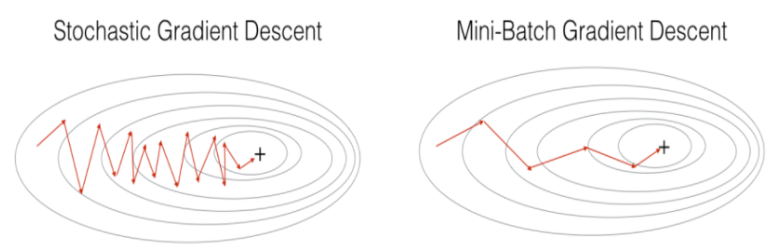

In [36]:
Image('/content/drive/MyDrive/CDS2(2022-2)/img/01/mb.png')

* 위와 동일

In [37]:
def get_update_weights_value_batch(bias, w1, w2, rm_batch, lstat_batch, target_batch, learning_rate=0.01):
    
    # 데이터 건수
    N = target_batch.shape[0]
    # 예측 값. 
    predicted_batch = w1 * rm_batch+ w2 * lstat_batch + bias
    # 실제값과 예측값의 차이 
    diff_batch = target_batch - predicted_batch
    # bias 를 array 기반으로 구하기 위해서 설정. 
    bias_factors = np.ones((N,))
    
    # weight와 bias를 얼마나 update할 것인지를 계산.  
    w1_update = -(2/N)*learning_rate*(np.dot(rm_batch.T, diff_batch))
    w2_update = -(2/N)*learning_rate*(np.dot(lstat_batch.T, diff_batch))
    bias_update = -(2/N)*learning_rate*(np.dot(bias_factors.T, diff_batch))
    
    # Mean Squared Error값을 계산. 
    #mse_loss = np.mean(np.square(diff))
    
    # weight와 bias가 update되어야 할 값 반환 
    return bias_update, w1_update, w2_update

* random하게 데이터를 뽑되 이번에는 batch(30)크기 만큼 뽑는다.

In [39]:
batch_indexes = np.random.choice(506, 30)
# 30개를 랜덤하게 뽑기
print(batch_indexes)

bostonDF['RM'].values[batch_indexes]

[257 486 251 249  58 100 101 398 207   1 361 141 383 427 441 436 330 198
 462 452 279 238 443 308  67 123 366 184 403 458]


array([8.704, 6.114, 6.438, 6.718, 6.145, 6.727, 6.781, 5.453, 5.783,
       6.421, 6.251, 5.019, 5.52 , 6.202, 6.406, 6.461, 6.144, 7.274,
       6.317, 6.297, 6.812, 6.481, 6.485, 6.635, 5.878, 5.856, 4.963,
       5.604, 5.349, 6.301])

In [40]:
# batch_gradient_descent()는 인자로 batch_size(배치 크기)를 입력 받음. 
def batch_random_gradient_descent(features, target, iter_epochs=1000, batch_size=30, verbose=True):
    
    np.random.seed = 2022
    w1 = np.zeros((1,))
    w2 = np.zeros((1,))
    bias = np.zeros((1, ))
    print('최초 w1, w2, bias:', w1, w2, bias)
    # w1, w2는 numpy array 연산을 위해 1차원 array로 변환하되 초기 값은 0으로 설정
    # bias도 1차원 array로 변환하되 초기 값은 1로 설정. 
    
    learning_rate = 0.01
    rm = features[:, 0]
    lstat = features[:, 1]
    # learning_rate와 RM, LSTAT 피처 지정. 호출 시 numpy array형태로 RM과 LSTAT으로 된 2차원 feature가 입력됨.



    # iter_epochs 수만큼 반복하면서 weight와 bias update 수행. 
    for i in range(iter_epochs):
        
        ###################
        #### Batch-SGD ####
        ###################
        
        # batch_size 갯수만큼 데이터를 임의로 선택. 
        batch_indexes = np.random.choice(target.shape[0], batch_size)
        # 앞서서는 1개의 point를 뽑았다면 이번에는 batch만큼 뽑는다.
        rm_batch = rm[batch_indexes]
        lstat_batch = lstat[batch_indexes]
        target_batch = target[batch_indexes]
        # Batch GD 기반으로 Weight/Bias의 Update를 구함. 

        ###################
        #### Batch-SGD ####
        ###################
        
        bias_update, w1_update, w2_update = get_update_weights_value_batch(bias, w1, w2, rm_batch, lstat_batch, target_batch, learning_rate)
        
        # Batch GD로 구한 weight/bias의 update 적용. 
        w1 = w1 - w1_update
        w2 = w2 - w2_update
        bias = bias - bias_update

        if verbose:
            print('Epoch:', i+1,'/', iter_epochs)
            # Loss는 전체 학습 데이터 기반으로 구해야 함.
            predicted = w1 * rm + w2*lstat + bias
            diff = target - predicted
            mse_loss = np.mean(np.square(diff))
            print('w1:', w1, 'w2:', w2, 'bias:', bias, 'loss:', mse_loss)
        
    return w1, w2, bias

In [41]:
w1, w2, bias = batch_random_gradient_descent(scaled_features, bostonDF['PRICE'].values, iter_epochs=5000, batch_size=30, verbose=True)
print('##### 최종 w1, w2, bias #######')
print(w1, w2, bias)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Epoch: 2502 / 5000
w1: [23.92828977] w2: [-21.26135782] bias: [16.28643141] loss: 31.000880788022982
Epoch: 2503 / 5000
w1: [23.93397698] w2: [-21.26425346] bias: [16.28877221] loss: 30.997793725596686
Epoch: 2504 / 5000
w1: [23.92377723] w2: [-21.27212471] bias: [16.27042487] loss: 31.006696186392226
Epoch: 2505 / 5000
w1: [23.93286703] w2: [-21.27168353] bias: [16.29338246] loss: 30.99559300824018
Epoch: 2506 / 5000
w1: [23.96595779] w2: [-21.2658087] bias: [16.34672652] loss: 30.973609900259127
Epoch: 2507 / 5000
w1: [23.98115603] w2: [-21.2619058] bias: [16.37148527] loss: 30.967256746574048
Epoch: 2508 / 5000
w1: [23.98886422] w2: [-21.26473737] bias: [16.38032452] loss: 30.96417069060179
Epoch: 2509 / 5000
w1: [23.97395935] w2: [-21.25873203] bias: [16.36442215] loss: 30.970353789224482
Epoch: 2510 / 5000
w1: [23.97097218] w2: [-21.26640366] bias: [16.34753949] loss: 30.97209677263674
Epoch: 2511 / 5000
w1: [23.98967146] w2: [-21.27181023] bias

In [42]:
predicted = scaled_features[:, 0]*w1 + scaled_features[:, 1]*w2 + bias
bostonDF['PREDICTED_PRICE_BATCH_RANDOM'] = predicted
bostonDF.head(10)
# 위와 동일하게 예측

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,PREDICTED_PRICE_SGD,PREDICTED_PRICE_BATCH_RANDOM
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,28.821865,29.003615
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,25.317697,25.564118
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,32.317842,32.607301
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,32.169810,32.393884
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,31.270271,31.582098
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7,27.988059,28.144304
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9,21.199480,21.435852
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1,17.455874,17.883811
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5,7.709750,8.275030
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9,18.038938,18.383040


### iteration 시에 순차적으로 일정한 batch 크기만큼의 데이터를 전체 학습데이터에 걸쳐서 가져오는 Mini-Batch GD 수행

실행 구간 먼저 실행 : shift + enter

In [43]:
for batch_step in range(0, 506, 30):
    # 0에서 506까지 30개씩
    print(batch_step)

0
30
60
90
120
150
180
210
240
270
300
330
360
390
420
450
480


In [44]:
bostonDF['PRICE'].values[480:510]
# values[index:index+batch_size] : batch_size 수만큼 뺄수있음.

array([23. , 23.7, 25. , 21.8, 20.6, 21.2, 19.1, 20.6, 15.2,  7. ,  8.1,
       13.6, 20.1, 21.8, 24.5, 23.1, 19.7, 18.3, 21.2, 17.5, 16.8, 22.4,
       20.6, 23.9, 22. , 11.9])

In [45]:
# batch_gradient_descent()는 인자로 batch_size(배치 크기)를 입력 받음. 
def batch_gradient_descent(features, target, iter_epochs=1000, batch_size=30, verbose=True):
    
    np.random.seed = 2022
    w1 = np.zeros((1,))
    w2 = np.zeros((1,))
    bias = np.zeros((1, ))
    print('최초 w1, w2, bias:', w1, w2, bias)
    # w1, w2는 numpy array 연산을 위해 1차원 array로 변환하되 초기 값은 0으로 설정
    # bias도 1차원 array로 변환하되 초기 값은 1로 설정. 

    
    learning_rate = 0.01
    rm = features[:, 0]
    lstat = features[:, 1]
    # learning_rate와 RM, LSTAT 피처 지정. 호출 시 numpy array형태로 RM과 LSTAT으로 된 2차원 feature가 입력됨.


    # iter_epochs 수만큼 반복하면서 weight와 bias update 수행. 
    for i in range(iter_epochs):

        ########################
        #### Batch-iter-SGD ####
        ########################

        # batch_size 만큼 데이터를 가져와서 weight/bias update를 수행하는 로직을 전체 데이터 건수만큼 반복
        for batch_step in range(0, target.shape[0], batch_size):
            # batch_size만큼 순차적인 데이터를 가져옴. 
            # 전부 동일한데 순차적으로 데이터를 가져옴.
            rm_batch = rm[batch_step:batch_step + batch_size]
            lstat_batch = lstat[batch_step:batch_step + batch_size]
            target_batch = target[batch_step:batch_step + batch_size]

        ########################
        #### Batch-iter-SGD ####
        ########################
        
            bias_update, w1_update, w2_update = get_update_weights_value_batch(bias, w1, w2, rm_batch, lstat_batch, target_batch, learning_rate)

            # Batch GD로 구한 weight/bias의 update 적용. 
            w1 = w1 - w1_update
            w2 = w2 - w2_update
            bias = bias - bias_update
        
            if verbose:
                print('Epoch:', i+1,'/', iter_epochs, 'batch step:', batch_step)
                # Loss는 전체 학습 데이터 기반으로 구해야 함.
                predicted = w1 * rm + w2*lstat + bias
                diff = target - predicted
                mse_loss = np.mean(np.square(diff))
                print('w1:', w1, 'w2:', w2, 'bias:', bias, 'loss:', mse_loss)
        
    return w1, w2, bias

In [46]:
w1, w2, bias = batch_gradient_descent(scaled_features, bostonDF['PRICE'].values, iter_epochs=1000, batch_size=30, verbose=True)
print('##### 최종 w1, w2, bias #######')
print(w1, w2, bias)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Epoch: 854 / 1000 batch step: 0
w1: [26.15267998] w2: [-23.43709373] bias: [15.81606781] loss: 30.53223376984131
Epoch: 854 / 1000 batch step: 30
w1: [26.14598024] w2: [-23.43711962] bias: [15.8027579] loss: 30.537048418038978
Epoch: 854 / 1000 batch step: 60
w1: [26.12436241] w2: [-23.44417824] bias: [15.76161218] loss: 30.556555108837195
Epoch: 854 / 1000 batch step: 90
w1: [26.11779461] w2: [-23.4481317] bias: [15.74631811] loss: 30.565142332858873
Epoch: 854 / 1000 batch step: 120
w1: [26.12764148] w2: [-23.41728589] bias: [15.78289328] loss: 30.54488545381201
Epoch: 854 / 1000 batch step: 150
w1: [26.16215565] w2: [-23.41585785] bias: [15.82696324] loss: 30.526782291570406
Epoch: 854 / 1000 batch step: 180
w1: [26.22967608] w2: [-23.39880648] bias: [15.92936658] loss: 30.515017835520016
Epoch: 854 / 1000 batch step: 210
w1: [26.26632324] w2: [-23.37842524] bias: [15.98828504] loss: 30.527291931015583
Epoch: 854 / 1000 batch step: 240
w1: [26.305

In [47]:
predicted = scaled_features[:, 0]*w1 + scaled_features[:, 1]*w2 + bias
bostonDF['PREDICTED_PRICE_BATCH'] = predicted
bostonDF.head(10)
# 위와 동일하게 예측 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,PREDICTED_PRICE_SGD,PREDICTED_PRICE_BATCH_RANDOM,PREDICTED_PRICE_BATCH
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,28.821865,29.003615,28.830077
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,25.317697,25.564118,25.370027
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,32.317842,32.607301,32.508278
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,32.169810,32.393884,32.272631
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,31.270271,31.582098,31.477882
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7,27.988059,28.144304,27.953052
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9,21.199480,21.435852,21.190621
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1,17.455874,17.883811,17.655029
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5,7.709750,8.275030,7.975749
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9,18.038938,18.383040,18.134764


### Mini BATCH GD를 Keras로 수행
* Keras는 기본적으로 Mini Batch GD를 수행

In [48]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Dense(1, input_shape=(2, ), activation=None, kernel_initializer='zeros', bias_initializer='ones')
])

In [49]:
model.compile(optimizer=Adam(learning_rate=0.01), loss='mse', metrics=['mse'])
# Adam optimizer를 이용하고 Loss 함수는 Mean Squared Error, 성능 측정 역시 MSE를 이용하여 학습 수행.
model.fit(scaled_features, bostonDF['PRICE'].values, batch_size=30, epochs=1000)
# Keras는 반드시 Batch GD를 적용함. batch_size가 None이면 32를 할당. 

Epoch 1/1000
17/17 [==============================] - 0s 2ms/step - loss: 541.9104 - mse: 541.9104
Epoch 2/1000
17/17 [==============================] - 0s 1ms/step - loss: 529.0038 - mse: 529.0038
Epoch 3/1000
17/17 [==============================] - 0s 1ms/step - loss: 516.3081 - mse: 516.3081
Epoch 4/1000
17/17 [==============================] - 0s 1ms/step - loss: 503.8746 - mse: 503.8746
Epoch 5/1000
17/17 [==============================] - 0s 1ms/step - loss: 491.8095 - mse: 491.8095
Epoch 6/1000
17/17 [==============================] - 0s 1ms/step - loss: 479.8951 - mse: 479.8951
Epoch 7/1000
17/17 [==============================] - 0s 2ms/step - loss: 468.4003 - mse: 468.4003
Epoch 8/1000
17/17 [==============================] - 0s 2ms/step - loss: 457.0465 - mse: 457.0465
Epoch 9/1000
17/17 [==============================] - 0s 1ms/step - loss: 446.1053 - mse: 446.1053
Epoch 10/1000
17/17 [==============================] - 0s 1ms/step - loss: 435.2550 - mse: 435.2550
Epoch 11/

In [50]:
predicted = model.predict(scaled_features)
# 학습한 모델로 예측
bostonDF['KERAS_PREDICTED_PRICE_BATCH'] = predicted
bostonDF.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,PREDICTED_PRICE_SGD,PREDICTED_PRICE_BATCH_RANDOM,PREDICTED_PRICE_BATCH,KERAS_PREDICTED_PRICE_BATCH
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,28.821865,29.003615,28.830077,28.974064
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,25.317697,25.564118,25.370027,25.499615
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,32.317842,32.607301,32.508278,32.636284
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,32.169810,32.393884,32.272631,32.412025
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,31.270271,31.582098,31.477882,31.601049
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7,27.988059,28.144304,27.953052,28.100815
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9,21.199480,21.435852,21.190621,21.318451
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1,17.455874,17.883811,17.655029,17.745901
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5,7.709750,8.275030,7.975749,8.034071
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9,18.038938,18.383040,18.134764,18.240904
